In [142]:
import os 
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [144]:
%matplotlib inline


In [337]:
def getPackageNameAndDependencies(path):
    with open(os.path.join(path, "package.json")) as f:
        packageFile = json.load(f)

    packageName = packageFile["name"]
    dependencies = packageFile["dependencies"]
    return packageName, dependencies

In [338]:
def joinDependencyVersion(dependencyList):
    dep = []
    for k in dependencyList.keys():
        dep.append(k+'@'+dependencyList[k])
    return dep

In [353]:
path = "D:/Updated Repository/imodeljs-core/core/backend/"


nodes = []
packageName, dependencies = getPackageNameAndDependencies(path)
dependencies = joinDependencyVersion(dependencies)

In [357]:


G = nx.DiGraph()
G.add_node(packageName)
G.add_nodes_from(dependencies)

for d in dependencies:
    G.add_edges_from([(packageName, d)])



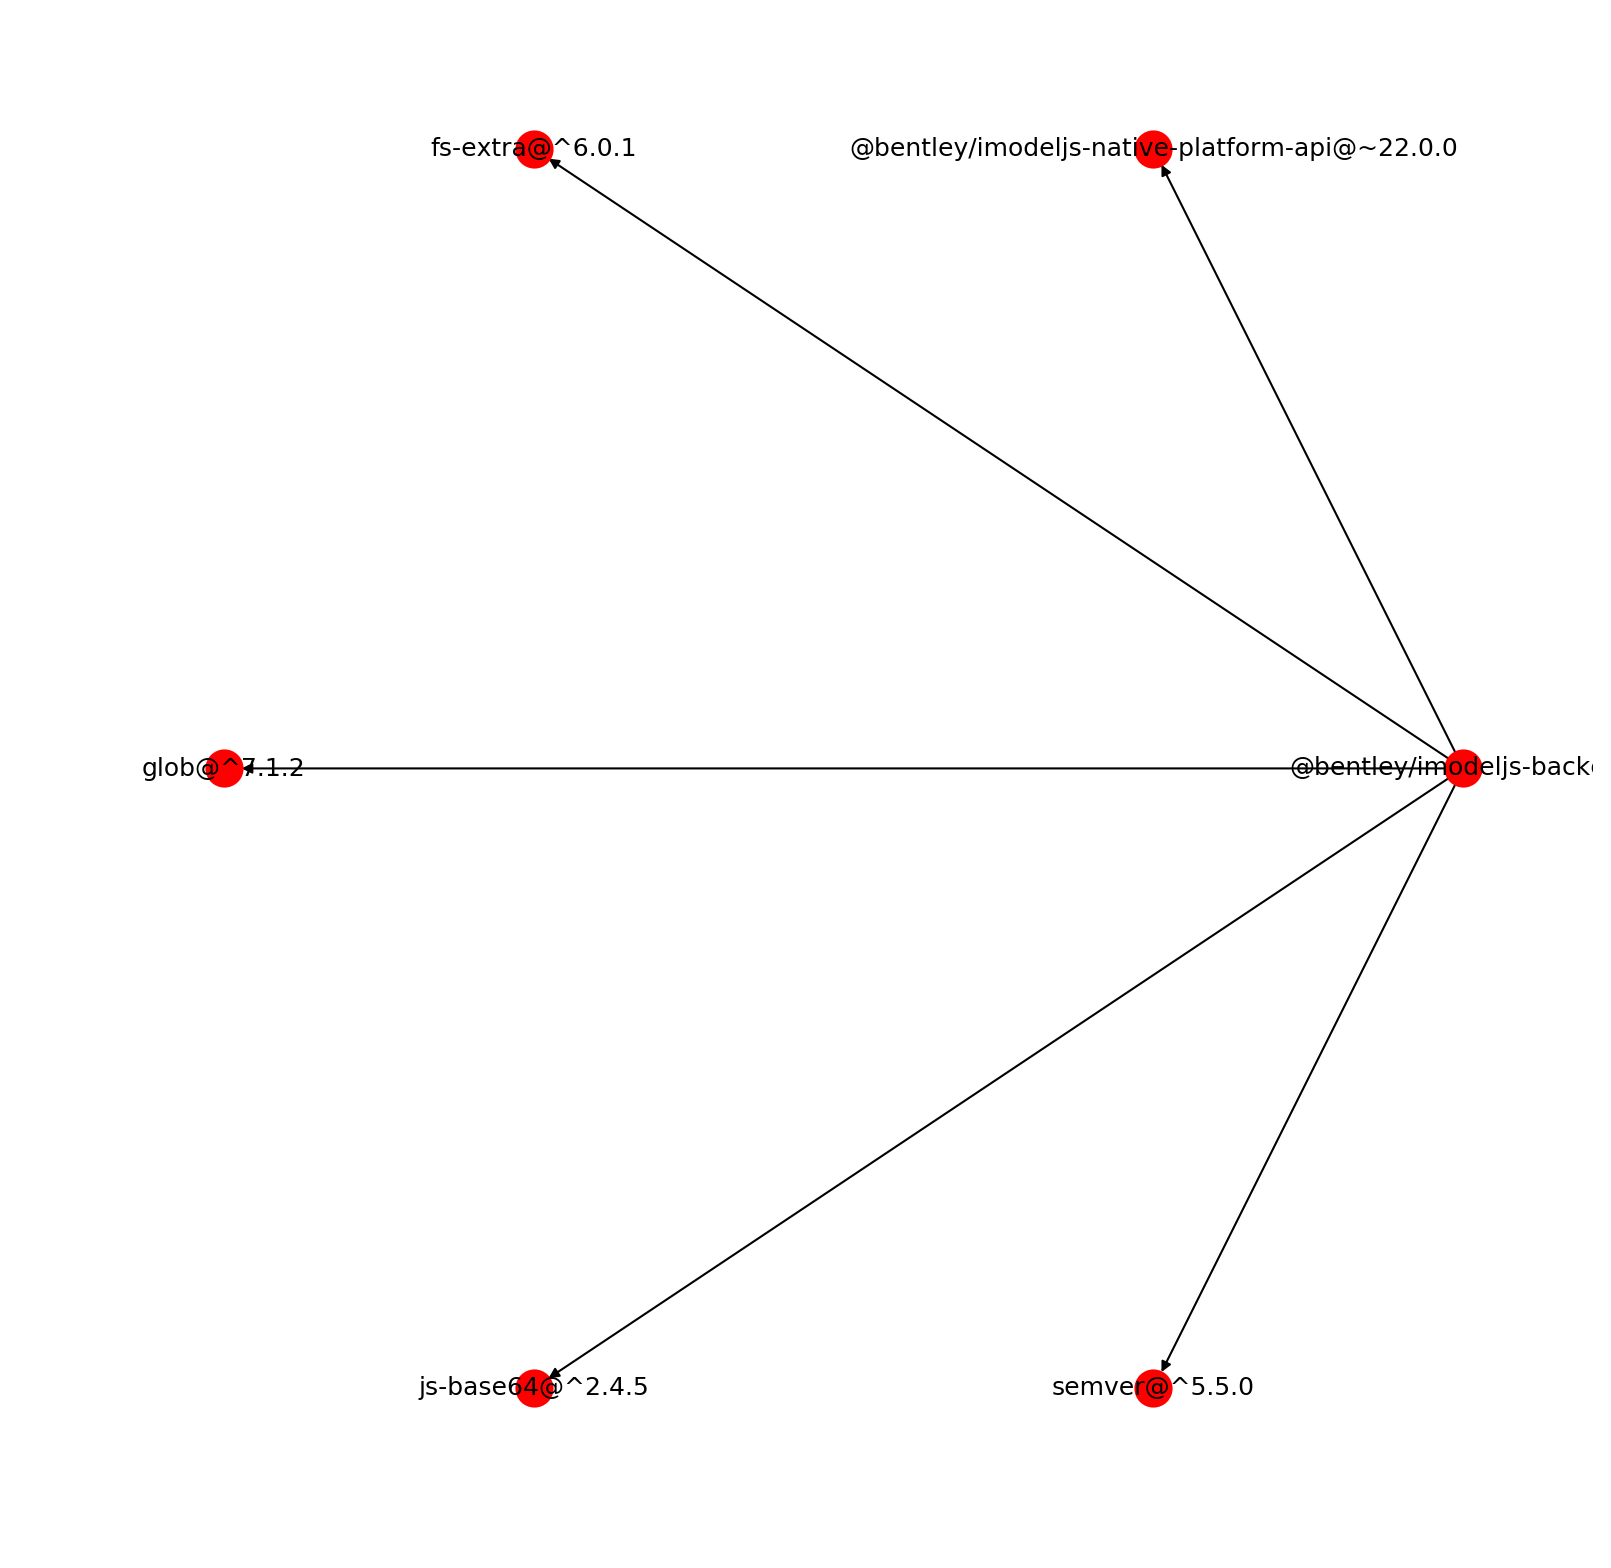

In [365]:
figure(num=None, figsize=(10, 10), dpi=150, facecolor='w', edgecolor='k')
nx.draw_circular(G, with_labels=True)
plt.savefig('dependency_graph.png')

In [370]:
!cd core
!npm ls backend


imodeljs-core@ D:\Updated Repository\imodeljs-core
`-- (empty)

